# A run through of clustering procedures

### Begin by importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hierarchy
from scipy.cluster.hierarchy import dendrogram

''' Custom script files '''
from src.clustering import detect_clusters
%load_ext autoreload
%autoreload 2

### Generate and visualize test lattice

In [2]:
''' 5x5 sample lattice with 2 clusters in the middle, 
1 other connected across periodic boundaries'''

sample_lattice = np.zeros(shape=(5,5), dtype=np.int32)
sample_lattice[1, range(1,4)] = 1
sample_lattice[3, 2] = 1
sample_lattice[4,4] = 1
sample_lattice[4,0] = 1

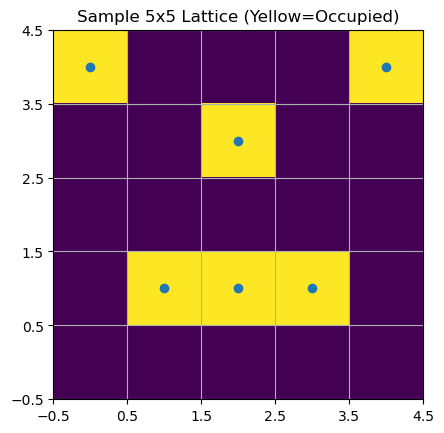

In [3]:
''' Plot and visualize; yellow+blue dot indicates occupied sites'''

plt.title("Sample 5x5 Lattice (Yellow=Occupied)")
plt.xticks(np.arange(-0.5,5.0,1))
plt.yticks(np.arange(-0.5,5.0,1))
plt.grid()
plt.imshow(sample_lattice, origin="lower")

# Pinpoint the lattice sites
occupied_pts = np.transpose(np.nonzero(sample_lattice))
plt.scatter(occupied_pts[:,1], occupied_pts[:,0])

### Perform hierarchical clustering

`linkage_matrix` records the merger of the $N$ observations (lattice sites) at every step. It is a standard output of hierarchical clustering implementations, and contains the information needed for plotting and cutting a dendrogram. For an quick overview, see [this blog post](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Visualizing-Your-Clusters).

As for `HCStats`, it records the observations (lattice sites) allocated to each cluster. There are 3 columns in this NumPy array: the X, Y coordinates of each lattice site, followed by an integer cluster ID.

In [4]:
cutoff = 1.1
linkage_matrix, HCStats = detect_clusters(
    data=sample_lattice, method="single", dendrogram_cutoff=cutoff
)

### Demonstrate dendrogram; cutting it horizontally

[[0.         1.         1.         2.        ]
 [2.         6.         1.         3.        ]
 [3.         7.         2.         4.        ]
 [4.         8.         2.23606798 5.        ]
 [5.         9.         2.23606798 6.        ]]


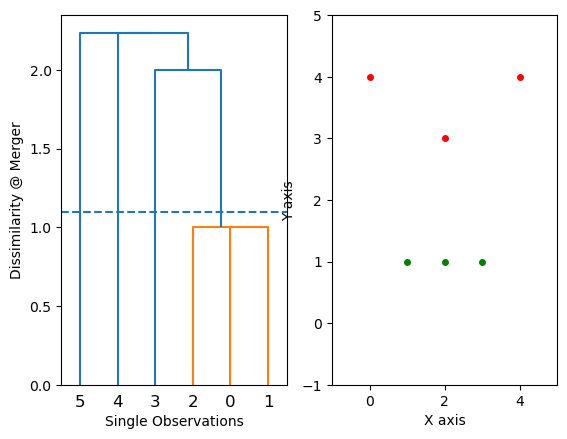

In [5]:
fig1, axes = plt.subplots(1,2)
# plt.rcParams['figure.figsize'] = (12,5)
# plt.rcParams['font.size'] = 20

# Plot dendrogram with cut-off shown
dendrogram(linkage_matrix, ax=axes[0])
axes[0].hlines(y=cutoff,xmin=0, xmax=100, linestyles="dashed")

# Plot scatter plot of data points, colored-coded by cluster
max_cluster_id = HCStats[-1,-1]

for cid in range(0, max_cluster_id+1):
    mask = (HCStats[:,-1] == cid)
    X = HCStats[mask,0]
    Y = HCStats[mask,1]
    if cid == 0:
        axes[1].scatter(X, Y, color='g', s=16)
    else:
        axes[1].scatter(X, Y, color='r', s=16)
    
axes[0].set_ylabel("Dissimilarity @ Merger")
axes[0].set_xlabel("Single Observations")
axes[1].set_ylabel("Y axis")
axes[1].set_xlabel("X axis")

axes[1].set_xlim([-1,5]); axes[1].set_ylim([-1,5])
print(linkage_matrix)

### Plotting all graphs, side-by-side

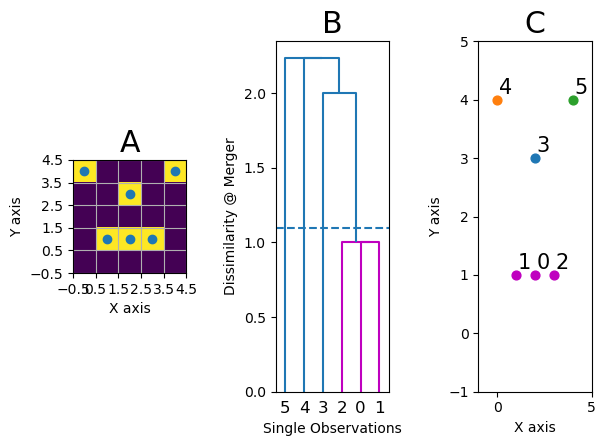

In [6]:
fig2,axes = plt.subplots(1,3)
fig2.figsize = (16,5)
plt.rcParams['font.size'] = 18

axes[0].set_title("A")
axes[0].set_xticks(np.arange(-0.5,5.0,1))
axes[0].set_yticks(np.arange(-0.5,5.0,1))
axes[0].grid()
axes[0].imshow(sample_lattice, origin="lower")

# Pinpoint the lattice sites
occupied_pts = np.transpose(np.nonzero(sample_lattice))
axes[0].scatter(occupied_pts[:,1], occupied_pts[:,0])
axes[0].set_ylabel("Y axis")
axes[0].set_xlabel("X axis")

# Plot the dendrogram
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
dendrogram(linkage_matrix, ax=axes[1])
axes[1].hlines(y=cutoff,xmin=0, xmax=100, linestyles="dashed")
axes[1].set_title("B")
axes[1].set_ylabel("Dissimilarity @ Merger")
axes[1].set_xlabel("Single Observations")

# Plot scatter plot of data points, colored-coded by cluster
max_cluster_id = HCStats[-1,-1]

for cid in range(0, max_cluster_id+1):
    mask = (HCStats[:,-1] == cid)
    X = HCStats[mask,0]
    Y = HCStats[mask,1]
    if cid == 0:
        axes[2].scatter(X, Y, color='m', s=40)
    else:
        axes[2].scatter(X, Y, s=40)
        
axes[2].set_title("C")
axes[2].set_xlim([-1,5]); axes[2].set_ylim([-1,5])
axes[2].set_ylabel("Y axis")
axes[2].set_xlabel("X axis")

plt.tight_layout()

# Finally, code up the 
coordinates = [(2,1), (1,1), (3,1), (2,3), (0,4), (4,4)]
for index, pt in enumerate(coordinates):
    x,y = pt
    #axes[2].scatter(x, y)
    axes[2].text(x+0.1,y+0.1,str(index),fontsize=15)

fig2.savefig("SampleData.png")